In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'

import numpy as np
import pandas as pd
import os
import sympy 
# import numpy.linalg as LA
from sympy import *
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #指定默认字体 SimHei为黑体
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
sympy.init_printing(use_latex=True)
# x, y, z = symbols('x y z',real=True)

import torch
import scipy.linalg as la
import numpy.linalg as LA

np.set_printoptions(precision=2,suppress=True)

#Note that http urls will not be displayed. Only https are allowed inside the Iframe
from IPython.display import IFrame

# 损失函数

In [2]:
IFrame('https://arxiv.org/pdf/1712.09913.pdf',width=800,height=600)

## 均方差

In [29]:
mse=nn.MSELoss()
mses = nn.MSELoss(reduction="sum")

In [30]:
x = torch.Tensor([0.5,0.5,0.5])
y = torch.Tensor([1.0,0.0,1.0])
loss = mse(x,y)
loss
mses(x, y)
((x-y)**2).mean()
((x-y)**2).sum()

tensor(0.2500)

tensor(0.7500)

tensor(0.2500)

tensor(0.7500)

## 交叉熵

In [13]:
import torch.nn as nn

In [5]:
bce = nn.BCELoss()
ce = nn.CrossEntropyLoss()
nll = nn.NLLLoss()

### BCE

In [6]:
x = torch.Tensor([0.5,0.5])
y = torch.Tensor([1.0,0.0])
loss = bce(x,y)
loss
x
y
-y*torch.log(x)
-(1-y)*torch.log(1-x)
-y*torch.log(x)-(1-y)*torch.log(1-x)
torch.mean(-y*torch.log(x)-(1-y)*torch.log(x))

tensor(0.6931)

tensor([0.5000, 0.5000])

tensor([1., 0.])

tensor([0.6931, 0.0000])

tensor([0.0000, 0.6931])

tensor([0.6931, 0.6931])

tensor(0.6931)

In [44]:
x = torch.Tensor([0.5, 0.5, 0.5])
y = torch.Tensor([1.0, 1.0, 0.0])
loss = bce(x,y)
loss
x
y
-y*torch.log(x)
-(1-y)*torch.log(1-x)
-y*torch.log(x)-(1-y)*torch.log(1-x)
torch.mean(-y*torch.log(x)-(1-y)*torch.log(x))

tensor(0.6931)

tensor([0.5000, 0.5000, 0.5000])

tensor([1., 1., 0.])

tensor([0.6931, 0.6931, 0.0000])

tensor([0.0000, 0.0000, 0.6931])

tensor([0.6931, 0.6931, 0.6931])

tensor(0.6931)

In [94]:
# x = torch.Tensor([0.5, 0.5, 0.5])
x = torch.randn(3)
x = nn.Sigmoid()(x)
y = torch.Tensor([1.0, 1.0, 0.0])
bw = bce.weight
print(bw)
bce.weight
loss = bce(x,y)
"loss"
loss
x
y
-y*torch.log(x)
-(1-y)*torch.log(1-x)
-y*torch.log(x)-(1-y)*torch.log(1-x)
torch.mean(-y*torch.log(x)-(1-y)*torch.log(x))

None


'loss'

tensor(0.6419)

tensor([0.4041, 0.5995, 0.3984])

tensor([1., 1., 0.])

tensor([0.9061, 0.5116, 0.0000])

tensor([0.0000, 0.0000, 0.5081])

tensor([0.9061, 0.5116, 0.5081])

tensor(0.7794)

In [132]:
# bce = nn.BCELoss(weight=torch.Tensor([1.0]))
bce = nn.BCELoss()
# x = torch.Tensor([0.5, 0.5, 0.5])
# x = 0.5*torch.ones(3,3).float()
x = torch.randn(3,3)
x = nn.Sigmoid()(x)
y = torch.randint(0,2,(3,3)).float()
# x
# y
bw = bce.weight
print(bw)
bce.weight
loss = bce(x,y)
"loss"
loss
x
y
-y*torch.log(x)
-(1-y)*torch.log(1-x)
-y*torch.log(x)-(1-y)*torch.log(1-x)
torch.mean(-y*torch.log(x)-(1-y)*torch.log(1-x))

None


'loss'

tensor(0.5537)

tensor([[0.6143, 0.8646, 0.2717],
        [0.3824, 0.6330, 0.1805],
        [0.5695, 0.0774, 0.7857]])

tensor([[1., 1., 1.],
        [1., 0., 0.],
        [1., 0., 1.]])

tensor([[0.4872, 0.1455, 1.3031],
        [0.9612, 0.0000, 0.0000],
        [0.5631, 0.0000, 0.2412]])

tensor([[0.0000, 0.0000, 0.0000],
        [0.0000, 1.0024, 0.1990],
        [0.0000, 0.0806, 0.0000]])

tensor([[0.4872, 0.1455, 1.3031],
        [0.9612, 1.0024, 0.1990],
        [0.5631, 0.0806, 0.2412]])

tensor(0.5537)

In [130]:
import math
a = 0.6225
math.log(a)
math.log(1-a)

In [134]:
# x = torch.Tensor([0.5, 0.5, 0.5])
w = torch.randn(3)
w
# bce2 = nn.BCELoss(weight=w)
bce2 = nn.BCELoss()
x = torch.randn(3)
x = nn.Sigmoid()(x)
y = torch.Tensor([1.0, 1.0, 0.0])
bw = bce2.weight
print(bw)
bce.weight
loss = bce2(x,y)
"loss"
loss
"x"
x
"y"
y
-y*torch.log(x)
-(1-y)*torch.log(1-x)
-y*torch.log(x)-(1-y)*torch.log(1-x)
torch.mean(-y*torch.log(x)-(1-y)*torch.log(1-x))
if bw!=None:
    torch.mean(bw*(-y*torch.log(x)-(1-y)*torch.log(1-x)))

tensor([ 0.8826, -0.9937, -0.9207])

None


'loss'

tensor(1.0345)

'x'

tensor([0.3765, 0.4969, 0.7600])

'y'

tensor([1., 1., 0.])

tensor([0.9767, 0.6994, 0.0000])

tensor([0.0000, 0.0000, 1.4273])

tensor([0.9767, 0.6994, 1.4273])

tensor(1.0345)

### CrossEntrophy

In [8]:
ce = nn.CrossEntropyLoss()
# x = torch.ones((3,3),dtype=torch.float32)/4
x = torch.randn(3, 3)
x
y = torch.tensor([1,1,2],dtype=torch.long)
y
x
loss = ce(x,y)
'loss'
loss
y0 = torch.nn.functional.one_hot(y, 3)
x = nn.Softmax(dim=-1)(x)
x.sum(dim=-1)
'y0'
y0
l1 = -y0*torch.log(x)
l1
l1.sum()/x.size(0)
# torch.mean(-y*torch.log(x)*3)
# s1 = torch.sum(-torch.log(x), dim=-1)
# s1
# torch.mean(s1)/3
# "**********"
# -(1-y)*torch.log(1-x)
# torch.mean(-(1-y)*torch.log(1-x)*3)
# -y*torch.log(x)-(1-y)*torch.log(1-x)
# torch.mean(-y*torch.log(x)-(1-y)*torch.log(1-x))

tensor([[-0.1114,  1.1161,  0.8738],
        [-0.4080, -1.7143, -1.0508],
        [-0.6378,  0.2640,  2.0925]])

tensor([1, 1, 2])

tensor([[-0.1114,  1.1161,  0.8738],
        [-0.4080, -1.7143, -1.0508],
        [-0.6378,  0.2640,  2.0925]])

'loss'

tensor(0.9424)

tensor([1.0000, 1.0000, 1.0000])

'y0'

tensor([[0, 1, 0],
        [0, 1, 0],
        [0, 0, 1]])

tensor([[-0.0000, 0.7313, -0.0000],
        [-0.0000, 1.8922, -0.0000],
        [-0.0000, -0.0000, 0.2036]])

tensor(0.9424)

In [45]:
# x = torch.arange(1, 26.).reshape(5,5)/100
x = torch.randn(5,5)
x
y = torch.tensor([0,1,2,3,4],dtype=torch.long)
y
loss = ce(x,y)
'loss1'
loss
x1 = nn.Softmax(dim=-1)(x)
x1 = torch.log(x1)
x1
loss2 = nll(x1, y)
'loss2'
loss2
x1.mean()

x = nn.Softmax(dim=-1)(x)
x
y = torch.nn.functional.one_hot(y, 5)

torch.mean(-y*torch.log(x))*x.size(0)

tensor([[ 3.1802e-01, -6.9918e-01,  6.3516e-01,  5.2529e-01,  2.4690e-01],
        [-5.6496e-01, -1.6991e+00, -2.8317e-01,  6.5413e-01,  5.6835e-04],
        [-5.7234e-01,  1.6078e+00,  1.0007e-01, -1.0746e+00, -1.0924e-01],
        [ 2.4635e-01, -9.9438e-01,  1.1587e+00,  1.2039e+00, -2.5186e-01],
        [-1.9443e+00, -1.9203e+00,  1.1464e+00,  2.3850e+00, -3.5508e-02]])

tensor([0, 1, 2, 3, 4])

'loss1'

tensor(2.0981)

tensor([[-1.5885, -2.6057, -1.2714, -1.3812, -1.6596],
        [-2.0531, -3.1872, -1.7713, -0.8340, -1.4875],
        [-2.6391, -0.4589, -1.9667, -3.1414, -2.1760],
        [-1.9448, -3.1856, -1.0325, -0.9872, -2.4430],
        [-4.6696, -4.6456, -1.5789, -0.3403, -2.7608]])

'loss2'

tensor(2.0981)

tensor(-2.0724)

tensor([[0.2042, 0.0739, 0.2804, 0.2513, 0.1902],
        [0.1283, 0.0413, 0.1701, 0.4343, 0.2259],
        [0.0714, 0.6319, 0.1399, 0.0432, 0.1135],
        [0.1430, 0.0414, 0.3561, 0.3726, 0.0869],
        [0.0094, 0.0096, 0.2062, 0.7116, 0.0632]])

tensor(2.0981)

In [42]:
ce = nn.CrossEntropyLoss()
x = torch.Tensor([[0.3,0.3,0.4],[0.3,0.4,0.3],[0.1,0.2,0.7]])
y = torch.Tensor([[0,0,1],[0,1,0],[1,0,0]])
x
y
x0 = nn.Softmax(dim=-1)(x)
l1 = -y*torch.log(x0)
l1
l1.mean()*3
y0 = torch.tensor([2,1,0]).long()
l2 = ce(x,y0)
l2


tensor([[0.3000, 0.3000, 0.4000],
        [0.3000, 0.4000, 0.3000],
        [0.1000, 0.2000, 0.7000]])

tensor([[0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.]])

tensor([[0.0000, 0.0000, 1.0331],
        [0.0000, 1.0331, 0.0000],
        [1.3679, 0.0000, 0.0000]])

tensor(1.1447)

tensor(1.1447)

In [17]:
import torch
import torch.nn as nn
torch.manual_seed(100)
x_input=torch.randn(3,3)#随机生成输入 
print('x_input:\n',x_input) 
y_target=torch.tensor([1,2,0])#设置输出具体值 print('y_target\n',y_target)

#计算输入softmax，此时可以看到每一行加到一起结果都是1
softmax_func=nn.Softmax(dim=1)
soft_output=softmax_func(x_input)
print('soft_output:\n',soft_output)

#在softmax的基础上取log
log_output=torch.log(soft_output)
print('log_output:\n',log_output)

#对比softmax与log的结合与nn.LogSoftmaxloss(负对数似然损失)的输出结果，发现两者是一致的。
logsoftmax_func=nn.LogSoftmax(dim=1)
logsoftmax_output=logsoftmax_func(x_input)
print('logsoftmax_output:\n',logsoftmax_output)

#pytorch中关于NLLLoss的默认参数配置为：reducetion=True、size_average=True
nllloss_func=nn.NLLLoss()
nlloss_output=nllloss_func(logsoftmax_output,y_target)
print('nlloss_output:\n',nlloss_output)

#直接使用pytorch中的loss_func=nn.CrossEntropyLoss()看与经过NLLLoss的计算是不是一样
crossentropyloss=nn.CrossEntropyLoss()
crossentropyloss_output=crossentropyloss(x_input,y_target)
print('crossentropyloss_output:\n',crossentropyloss_output)

# logsoftmax_output
y_onehot = nn.functional.one_hot(y_target)
"y_onehot"
y_onehot
'l1'
l1 = -logsoftmax_output*y_onehot
l1
l1.sum()/3

x_input:
 tensor([[ 0.3607, -0.2859, -0.3938],
        [ 0.2429, -1.3833, -2.3134],
        [-0.3172, -0.8660,  1.7482]])
soft_output:
 tensor([[0.5015, 0.2627, 0.2358],
        [0.7848, 0.1543, 0.0609],
        [0.1056, 0.0610, 0.8333]])
log_output:
 tensor([[-0.6902, -1.3368, -1.4447],
        [-0.2424, -1.8686, -2.7987],
        [-2.2477, -2.7966, -0.1823]])
logsoftmax_output:
 tensor([[-0.6902, -1.3368, -1.4447],
        [-0.2424, -1.8686, -2.7987],
        [-2.2477, -2.7966, -0.1823]])
nlloss_output:
 tensor(2.1277)
crossentropyloss_output:
 tensor(2.1277)


'y_onehot'

tensor([[0, 1, 0],
        [0, 0, 1],
        [1, 0, 0]])

'l1'

tensor([[0.0000, 1.3368, 0.0000],
        [0.0000, 0.0000, 2.7987],
        [2.2477, 0.0000, 0.0000]])

tensor(2.1277)

[Pytorch常用的交叉熵损失函数CrossEntropyLoss()详解](https://zhuanlan.zhihu.com/p/98785902)

### NLL

In [38]:
x = torch.randn(4,5)
x
x = nn.Softmax(dim=-1)(x)
x = torch.log(x)
x
# x.mean()
y = torch.tensor([1,2,3,4],dtype=torch.long)
y
y1 = nn.functional.one_hot(y)
y1
loss = nll(x,y)
loss
l1 = -(y1*x).sum()/x.size(0)
l1

tensor([[ 0.5750, -0.2284, -0.2745, -0.4819, -0.4797],
        [ 0.1823, -0.1661,  0.2215, -0.4567,  0.0691],
        [-0.9207, -0.8856,  0.6233, -0.0567,  1.1203],
        [ 1.0345, -0.1160, -0.2395,  0.3385,  0.6822]])

tensor([[-0.9444, -1.7478, -1.7939, -2.0013, -1.9991],
        [-1.4271, -1.7755, -1.3879, -2.0660, -1.5403],
        [-2.8208, -2.7857, -1.2767, -1.9568, -0.7798],
        [-1.0288, -2.1793, -2.3029, -1.7248, -1.3812]])

tensor([1, 2, 3, 4])

tensor([[0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1]])

tensor(1.6184)

tensor(1.6184)

In [72]:
# x = -torch.ones((5,5),dtype=torch.float32)/2
x = -torch.arange(1, 26.).reshape(5,5)/100
x
y = torch.tensor([0,1,2,3,4],dtype=torch.long)
y
y1 = nn.functional.one_hot(y)
y1
loss = nll(x,y)
loss
x.sum()
x.mean()

tensor([[-0.0100, -0.0200, -0.0300, -0.0400, -0.0500],
        [-0.0600, -0.0700, -0.0800, -0.0900, -0.1000],
        [-0.1100, -0.1200, -0.1300, -0.1400, -0.1500],
        [-0.1600, -0.1700, -0.1800, -0.1900, -0.2000],
        [-0.2100, -0.2200, -0.2300, -0.2400, -0.2500]])

tensor([0, 1, 2, 3, 4])

tensor([[1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1]])

tensor(0.1300)

tensor(-3.2500)

tensor(-0.1300)

## focalloss


In [59]:
a = torch.arange(12)
m = a%3==0
a[m]
a.numel()

tensor([0, 3, 6, 9])

# 神经网络

# 优化器

In [12]:
import torch.nn as nn

## SGD 

In [23]:
layer = nn.Linear(2,1,bias=False)
nn.init.constant_(layer.weight, 0.5)

layer.weight
x = torch.Tensor([1,1])
y = layer(x)
y
"grad"
layer.weight.grad
label = torch.Tensor([2])
lossfn = nn.MSELoss()
loss = lossfn(y, label)
"loss"
loss
optimizer = torch.optim.SGD(layer.parameters(), lr=0.01)
optimizer.zero_grad()
loss.backward()
optimizer.step()
"grad"
layer.weight.grad
layer.weight

Parameter containing:
tensor([[0.5000, 0.5000]], requires_grad=True)

Parameter containing:
tensor([[0.5000, 0.5000]], requires_grad=True)

tensor([1.], grad_fn=<SqueezeBackward3>)

'grad'

'loss'

tensor(1., grad_fn=<MseLossBackward>)

'grad'

tensor([[-2., -2.]])

Parameter containing:
tensor([[0.5200, 0.5200]], requires_grad=True)

In [50]:
layer = nn.Linear(2,1,bias=False)
nn.init.constant_(layer.weight, 0.5)

layer.weight
x = torch.Tensor([1,1])
y = layer(x)
y
"grad"
layer.weight.grad
label = torch.Tensor([2])
lossfn = nn.MSELoss()
loss = lossfn(y, label)
"loss"
loss
optimizer = torch.optim.SGD(layer.parameters(), lr=0.01)
optimizer.zero_grad()
loss.backward()
# optimizer.step()
lr = 0.001
"grad"
layer.weight.grad
# right
# layer.weight.data -= lr*layer.weight.grad.data
layer.weight.data.sub_(lr*layer.weight.grad.data)
# wrong
# layer.weight.sub_(lr*layer.weight.grad)
# layer.weight -= lr*layer.weight.grad

layer.weight

Parameter containing:
tensor([[0.5000, 0.5000]], requires_grad=True)

Parameter containing:
tensor([[0.5000, 0.5000]], requires_grad=True)

tensor([1.], grad_fn=<SqueezeBackward3>)

'grad'

'loss'

tensor(1., grad_fn=<MseLossBackward>)

'grad'

tensor([[-2., -2.]])

tensor([[0.5020, 0.5020]])

Parameter containing:
tensor([[0.5020, 0.5020]], requires_grad=True)

## Adam

In [37]:
layer = nn.Linear(2,1,bias=False)
nn.init.constant_(layer.weight, 0.5)
layer.weight
x = torch.Tensor([1,1])
y = layer(x)
y
"grad"
layer.weight.grad
label = torch.Tensor([2])
lossfn = nn.MSELoss()
loss = lossfn(y, label)
"loss"
loss
optimizer = torch.optim.Adam(layer.parameters(), lr=0.001)
optimizer.zero_grad()
loss.backward()
optimizer.step()
"grad"
layer.weight.grad
layer.weight


Parameter containing:
tensor([[0.5000, 0.5000]], requires_grad=True)

Parameter containing:
tensor([[0.5000, 0.5000]], requires_grad=True)

tensor([1.], grad_fn=<SqueezeBackward3>)

'grad'

'loss'

tensor(1., grad_fn=<MseLossBackward>)

'grad'

tensor([[-2., -2.]])

Parameter containing:
tensor([[0.5010, 0.5010]], requires_grad=True)

In [47]:
layer = nn.Linear(2,1,bias=False)
nn.init.constant_(layer.weight, 0.5)
layer.weight
x = torch.Tensor([1,1])
y = layer(x)
y
"grad"
layer.weight.grad
label = torch.Tensor([2])
lossfn = nn.MSELoss()
loss = lossfn(y, label)
"loss"
loss
# optimizer = torch.optim.Adam(layer.parameters(), lr=0.001)
# optimizer.zero_grad()
layer.zero_grad()
loss.backward()
# optimizer.step()
"grad"
layer.weight.grad
layer.weight
gamma = 0.5
lr = 0.4

layer.weight.data -= (gamma*lr*layer.weight.grad.data)


Parameter containing:
tensor([[0.5000, 0.5000]], requires_grad=True)

Parameter containing:
tensor([[0.5000, 0.5000]], requires_grad=True)

tensor([1.], grad_fn=<SqueezeBackward3>)

'grad'

'loss'

tensor(1., grad_fn=<MseLossBackward>)

'grad'

tensor([[-2., -2.]])

Parameter containing:
tensor([[0.5000, 0.5000]], requires_grad=True)

# 面积

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


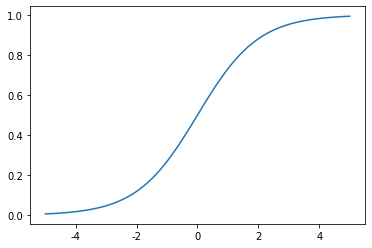

In [3]:
a = np.linspace(-5,5,100)
fa = lambda x:1/(1+np.exp(-x))
b = fa(a)
plt.plot(a,b)
num = 100000
ra = -5+10*np.random.rand(num,)
# ra
rb = np.random.rand(num,)
# rb
# rb<fa(ra)
# np.mean(rb<fa(ra))
area = np.mean(rb<fa(ra))*10
area

51

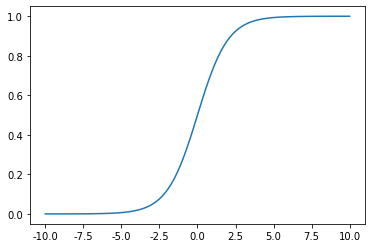

In [4]:
xlim = 10
a = np.linspace(-xlim,xlim,100)
fa = lambda x:1/(1+np.exp(-x))
# a
b = fa(a)
np.min(np.abs(a-0.2))
np.argmin(np.abs(a-0.23))
plt.plot(a,b)
num = 100000
ra = -xlim+2*xlim*np.random.rand(num,)
# ra
rb = np.random.rand(num,)
# # rb
# # rb<fa(ra)
# np.mean(rb<fa(ra))
b.shape
b1 = b.reshape(1,-1)
rb1 = rb.reshape(-1,1)
rbb = rb1-b1
rbb.shape

area = np.mean(rb<b[np.argmin(np.abs(rbb),axis=1)])*2*xlim
area
np.abs(area-xlim)/xlim

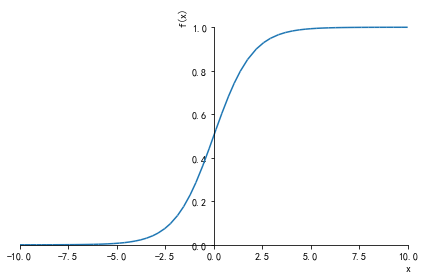

In [10]:
x,y = symbols('x y')
y = 1/(1+exp(-x))
plot(y)
Integral(y, x).doit()
Integral(y, (x, -10, 10)).doit()

# pytorch 官网

## https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html

In [5]:
import os
import numpy as np
import torch
from PIL import Image


class PennFudanDataset(object):
    def __init__(self, root, transforms):
        self.root = root
        self.transforms = transforms
        # load all image files, sorting them to
        # ensure that they are aligned
        self.imgs = list(sorted(os.listdir(os.path.join(root, "PNGImages"))))
        self.masks = list(sorted(os.listdir(os.path.join(root, "PedMasks"))))

    def __getitem__(self, idx):
        # load images ad masks
        img_path = os.path.join(self.root, "PNGImages", self.imgs[idx])
        mask_path = os.path.join(self.root, "PedMasks", self.masks[idx])
        img = Image.open(img_path).convert("RGB")
        # note that we haven't converted the mask to RGB,
        # because each color corresponds to a different instance
        # with 0 being background
        mask = Image.open(mask_path)
        # convert the PIL Image into a numpy array
        mask = np.array(mask)
        # instances are encoded as different colors
        obj_ids = np.unique(mask)
        # first id is the background, so remove it
        obj_ids = obj_ids[1:]

        # split the color-encoded mask into a set
        # of binary masks
        masks = mask == obj_ids[:, None, None]

        # get bounding box coordinates for each mask
        num_objs = len(obj_ids)
        boxes = []
        for i in range(num_objs):
            pos = np.where(masks[i])
            xmin = np.min(pos[1])
            xmax = np.max(pos[1])
            ymin = np.min(pos[0])
            ymax = np.max(pos[0])
            boxes.append([xmin, ymin, xmax, ymax])

        # convert everything into a torch.Tensor
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        # there is only one class
        labels = torch.ones((num_objs,), dtype=torch.int64)
        masks = torch.as_tensor(masks, dtype=torch.uint8)

        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        # suppose all instances are not crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["masks"] = masks
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd

        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self.imgs)

In [6]:
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

# load a pre-trained model for classification and return
# only the features
backbone = torchvision.models.mobilenet_v2(pretrained=True).features
# FasterRCNN needs to know the number of
# output channels in a backbone. For mobilenet_v2, it's 1280
# so we need to add it here
backbone.out_channels = 1280

# let's make the RPN generate 5 x 3 anchors per spatial
# location, with 5 different sizes and 3 different aspect
# ratios. We have a Tuple[Tuple[int]] because each feature
# map could potentially have different sizes and
# aspect ratios
anchor_generator = AnchorGenerator(sizes=((32, 64, 128, 256, 512),),
                                   aspect_ratios=((0.5, 1.0, 2.0),))

# let's define what are the feature maps that we will
# use to perform the region of interest cropping, as well as
# the size of the crop after rescaling.
# if your backbone returns a Tensor, featmap_names is expected to
# be [0]. More generally, the backbone should return an
# OrderedDict[Tensor], and in featmap_names you can choose which
# feature maps to use.
roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names=[0],
                                                output_size=7,
                                                sampling_ratio=2)

# put the pieces together inside a FasterRCNN model
model = FasterRCNN(backbone,
                   num_classes=2,
                   rpn_anchor_generator=anchor_generator,
                   box_roi_pool=roi_pooler)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /home/wen/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


In [7]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor


def get_model_instance_segmentation(num_classes):
    # load an instance segmentation model pre-trained pre-trained on COCO
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

    # get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # now get the number of input features for the mask classifier
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256
    # and replace the mask predictor with a new one
    model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask,
                                                       hidden_layer,
                                                       num_classes)

    return model

In [9]:
import torchvision.transforms as T

def get_transform(train):
    transforms = []
    transforms.append(T.ToTensor())
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

In [10]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
dataset = PennFudanDataset('PennFudanPed', get_transform(train=True))
data_loader = torch.utils.data.DataLoader(
 dataset, batch_size=2, shuffle=True, num_workers=4,
 collate_fn=utils.collate_fn)
# For Training
images,targets = next(iter(data_loader))
images = list(image for image in images)
targets = [{k: v for k, v in t.items()} for t in targets]
output = model(images,targets)   # Returns losses and detections
# For inference
model.eval()
x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
predictions = model(x)           # Returns predictions

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /home/wen/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


FileNotFoundError: [Errno 2] No such file or directory: 'PennFudanPed/PNGImages'

In [12]:
from engine import train_one_epoch, evaluate
import utils


def main():
    # train on the GPU or on the CPU, if a GPU is not available
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

    # our dataset has two classes only - background and person
    num_classes = 2
    # use our dataset and defined transformations
    dataset = PennFudanDataset('PennFudanPed', get_transform(train=True))
    dataset_test = PennFudanDataset('PennFudanPed', get_transform(train=False))

    # split the dataset in train and test set
    indices = torch.randperm(len(dataset)).tolist()
    dataset = torch.utils.data.Subset(dataset, indices[:-50])
    dataset_test = torch.utils.data.Subset(dataset_test, indices[-50:])

    # define training and validation data loaders
    data_loader = torch.utils.data.DataLoader(
        dataset, batch_size=2, shuffle=True, num_workers=4,
        collate_fn=utils.collate_fn)

    data_loader_test = torch.utils.data.DataLoader(
        dataset_test, batch_size=1, shuffle=False, num_workers=4,
        collate_fn=utils.collate_fn)

    # get the model using our helper function
    model = get_model_instance_segmentation(num_classes)

    # move model to the right device
    model.to(device)

    # construct an optimizer
    params = [p for p in model.parameters() if p.requires_grad]
    optimizer = torch.optim.SGD(params, lr=0.005,
                                momentum=0.9, weight_decay=0.0005)
    # and a learning rate scheduler
    lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                                   step_size=3,
                                                   gamma=0.1)

    # let's train it for 10 epochs
    num_epochs = 10

    for epoch in range(num_epochs):
        # train for one epoch, printing every 10 iterations
        train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
        # update the learning rate
        lr_scheduler.step()
        # evaluate on the test dataset
        evaluate(model, data_loader_test, device=device)

    print("That's it!")

ModuleNotFoundError: No module named 'torchvision.engine'

# test

In [5]:
a = b = 1
a
b

In [15]:
nx = 4
ny = 4 
x = torch.arange(nx)
y = torch.arange(ny)
a, b = torch.meshgrid(x,y)
a
b
# torch.stack((a, b), 2).view((1, 1, ny, nx, 2)).float()
torch.stack((a, b), 2)

tensor([[0, 0, 0, 0],
        [1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]])

tensor([[0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3]])

tensor([[[0, 0],
         [0, 1],
         [0, 2],
         [0, 3]],

        [[1, 0],
         [1, 1],
         [1, 2],
         [1, 3]],

        [[2, 0],
         [2, 1],
         [2, 2],
         [2, 3]],

        [[3, 0],
         [3, 1],
         [3, 2],
         [3, 3]]])

In [16]:
np.mod(100,3)

1

In [7]:
a = np.arange(12).reshape(4,3)
a 
a[::-1]
a[::-1,::-1]


array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

array([[ 9, 10, 11],
       [ 6,  7,  8],
       [ 3,  4,  5],
       [ 0,  1,  2]])

array([[11, 10,  9],
       [ 8,  7,  6],
       [ 5,  4,  3],
       [ 2,  1,  0]])

In [9]:
a = {1:'a',3:'b'}
a[0]

KeyError: 0

In [3]:
a= torch.arange(10)
b = a%3==0
b
c = torch.nonzero(b, as_tuple=False)
c

tensor([ True, False, False,  True, False, False,  True, False, False,  True])

tensor([[0],
        [3],
        [6],
        [9]])

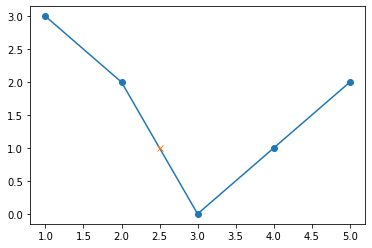

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = 2.5
xp = [1, 2, 3, 4, 5]
fp = [3, 2, 0,1,2]
y = np.interp(x, xp, fp)  # 1.0
plt.plot(xp, fp, '-o')
plt.plot(x, y, 'x')
plt.show()

In [6]:
import torch
a = torch.Tensor([-1,1,2,3])
a = torch.nn.Tanh()(a)
a
y = torch.Tensor([1,0,0,1])
lossfn = torch.nn.BCELoss()
loss = lossfn(a, y)
print(loss)

tensor([-0.7616,  0.7616,  0.9640,  0.9951])

RuntimeError: all elements of input should be between 0 and 1

In [24]:
a = torch.randint(3,9, (10,))
a
# torch.mean(a)
torch.median(a)

tensor([4, 4, 3, 4, 6, 8, 3, 5, 7, 5])

tensor(4)

In [27]:
a = np.arange(10)
m1 = a%3 == 0
m2 = a>4
m1
m2
m1+m2
m1*m2

array([ True, False, False,  True, False, False,  True, False, False,
        True])

array([False, False, False, False, False,  True,  True,  True,  True,
        True])

array([ True, False, False,  True, False,  True,  True,  True,  True,
        True])

array([False, False, False, False, False, False,  True, False, False,
        True])

In [10]:
l1 = nn.Conv2d(2,4,3,1,1)
l1.weight.shape
l1.bias.shape

torch.Size([4, 2, 3, 3])

torch.Size([4])

# end
